In [1]:
from time import sleep
import Pyro5.api 
import matplotlib.pyplot as plt
from TimeTagger import *
import numpy as np
from scipy.optimize import curve_fit
import os
import pandas as pd

In [2]:
# Ruta de la carpeta (usa una raw string para evitar errores con '\')
file_path = r'\\server\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251111'

# Lista para almacenar los datos
data = []

# Recorre todos los archivos en la carpeta y subcarpetas
for root, dirs, files in os.walk(file_path):
    for filename in files:
        name, ext = os.path.splitext(filename)
        full_path = os.path.join(root, filename)
        data.append({
            'File Name': name,
            'Extension': ext,
            'Full Path': full_path
        })

# Convierte los datos a un DataFrame para visualizarlos fácilmente
df = pd.DataFrame(data)

# Muestra las primeras filas
print(df.head())

print(f"\nTotal files found: {len(df)}")

                                 File Name Extension  \
0                                   README      .txt   
1  TimeTags_Background_2025-11-11_181142.1    .ttbin   
2    TimeTags_Background_2025-11-11_181142    .ttbin   
3  TimeTags_QWP_000deg_2025-11-11_173429.1    .ttbin   
4    TimeTags_QWP_000deg_2025-11-11_173429    .ttbin   

                                           Full Path  
0  \\server\groups\ding\PROJECTS\QKD_Perovskites\...  
1  \\server\groups\ding\PROJECTS\QKD_Perovskites\...  
2  \\server\groups\ding\PROJECTS\QKD_Perovskites\...  
3  \\server\groups\ding\PROJECTS\QKD_Perovskites\...  
4  \\server\groups\ding\PROJECTS\QKD_Perovskites\...  

Total files found: 77


In [9]:
channel_1 = []
channel_2 = []
channel_3 = []
channel_4 = []

for i in range(4, len(df), 2):

    print(df['Full Path'].iloc[i])
    file = df['Full Path'].iloc[i]
    fr = FileReader(file)
    print("Has data? ->", fr.hasData())

    config = fr.getConfiguration()
    virtual_tagger = createTimeTaggerVirtual()
    virtual_tagger.getConfiguration()

    ch1 = config['registered channels'][0]  
    ch2 = config['registered channels'][1]  
    ch3 = config['registered channels'][2]
    ch4 = config['registered channels'][3]

    cr = Countrate(virtual_tagger, [ch1, ch2, ch3, ch4])
    virtual_tagger.setReplaySpeed(-1.0) # Speed of -1.0 will replay the data as fast as possible
    virtual_tagger.replay(file, begin = 0, duration = -1) # collect data until the end 
    virtual_tagger.waitForCompletion()

    data = cr.getData()
    data_rounded = [round(float(x), 3) for x in data]  # redondear a 3 decimales

    channel_1.append(data_rounded[0])
    channel_2.append(data_rounded[1])
    channel_3.append(data_rounded[2])
    channel_4.append(data_rounded[3])


\\server\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251111\TimeTags_QWP_000deg_2025-11-11_173429.ttbin
Has data? -> True
\\server\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251111\TimeTags_QWP_010deg_2025-11-11_173518.ttbin
Has data? -> True
\\server\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251111\TimeTags_QWP_020deg_2025-11-11_173603.ttbin
Has data? -> True
\\server\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251111\TimeTags_QWP_030deg_2025-11-11_173649.ttbin
Has data? -> True
\\server\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251111\TimeTags_QWP_040deg_2025-11-11_173745.ttbin
Has data? -> True
\\server\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251111\TimeTags_QWP_050deg_2025-11-11_173837.ttbin
Has data? -> True
\\server\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251111\TimeTags_QWP_060deg_2025-11-11_173928.ttbin
Has data? -> True
\\server\groups\ding\PROJECTS\QKD_Perovsk

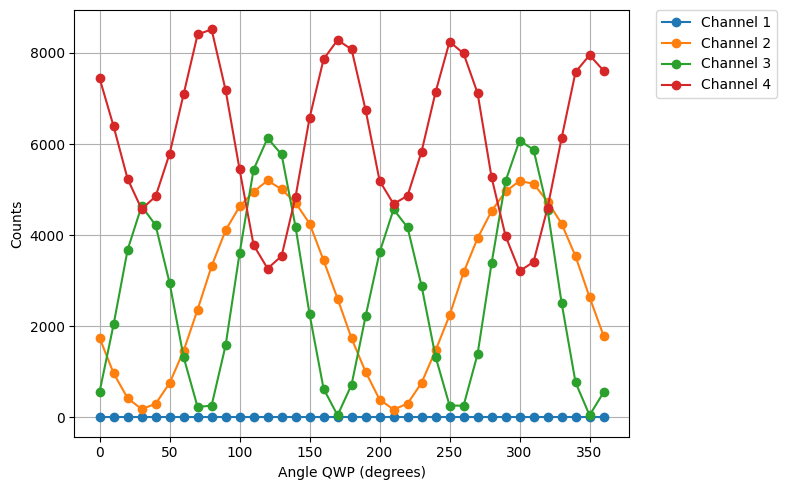

In [10]:
angle = np.arange(0, 361, 10)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(angle, channel_1, marker='o', label='Channel 1')
plt.plot(angle, channel_2, marker='o', label='Channel 2')
plt.plot(angle, channel_3, marker='o', label='Channel 3')
plt.plot(angle, channel_4, marker='o', label='Channel 4')

# Configuración
plt.xlabel("Angle QWP (degrees)")
plt.ylabel("Counts")

# Leyenda fuera de la gráfica (esquina superior derecha)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()
